In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense

from datetime import datetime

In [2]:
def assessment(f_data, f_y_feature, f_x_feature, f_index=-1):
    """
    Develops and displays a histogram and a scatter plot for a dependent / independent variable pair from
    a dataframe and, optionally, highlights a specific observation on the plot in a different color (red).
    
    Also optionally, if an independent feature is not informed, the scatterplot is not displayed.
    
    Keyword arguments:
    
    f_data      Tensor containing the dependent / independent variable pair.
                Pandas dataframe
    f_y_feature Dependent variable designation.
                String
    f_x_feature Independent variable designation.
                String
    f_index     If greater or equal to zero, the observation denoted by f_index will be plotted in red.
                Integer
    """
    for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'r','g')
            f_hue = None
        else:
            f_color = 'b'
            f_hue = None
    
    f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))
    
    f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='g')
    f_chart1.set_xlabel(f_x_feature,fontsize=10)
    
    if f_index >= 0:
        f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
        f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
        f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
    else:
        f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, hue=f_hue, legend=False)
        f_chart2.set_xlabel(f_x_feature,fontsize=10)
        f_chart2.set_ylabel(f_y_feature,fontsize=10)

    plt.show()

    
def correlation_map(f_data, f_feature, f_number):
    """
    Develops and displays a heatmap plot referenced to a primary feature of a dataframe, highlighting
    the correlation among the 'n' mostly correlated features of the dataframe.
    
    Keyword arguments:
    
    f_data      Tensor containing all relevant features, including the primary.
                Pandas dataframe
    f_feature   The primary feature.
                String
    f_number    The number of features most correlated to the primary feature.
                Integer
    """
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(20, 10))
        sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True,
                    center=0, annot=True, annot_kws={"size": 8}, cmap="PRGn")
    plt.show()

In [6]:
sns.set()
start_time = datetime.now()

data = pd.read_csv("C:/Users/Tanmay/smart_grid_stability_augmented.csv")

map1 = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].replace(map1)

data = data.sample(frac=1)

In [7]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
42256,4.553812,3.746438,4.861355,9.470573,4.601392,-1.908753,-1.930967,-0.761672,0.567164,0.422702,0.962152,0.680100,0.056894,0
59672,1.602995,7.801841,3.831532,4.588433,2.955252,-0.653653,-0.730002,-1.571597,0.754546,0.395038,0.408686,0.052764,-0.057037,1
53927,7.025199,0.715251,8.574977,6.613475,4.696096,-1.934412,-1.684286,-1.077399,0.721606,0.340888,0.873233,0.425179,0.048436,0
13067,1.295080,0.585605,4.017649,4.570781,3.973165,-1.707071,-1.523164,-0.742930,0.127838,0.473844,0.875204,0.069724,-0.039862,1
13206,2.634155,3.472336,6.701973,3.338420,4.145128,-1.877891,-1.408058,-0.859178,0.472512,0.127033,0.312848,0.235152,-0.040474,1


D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


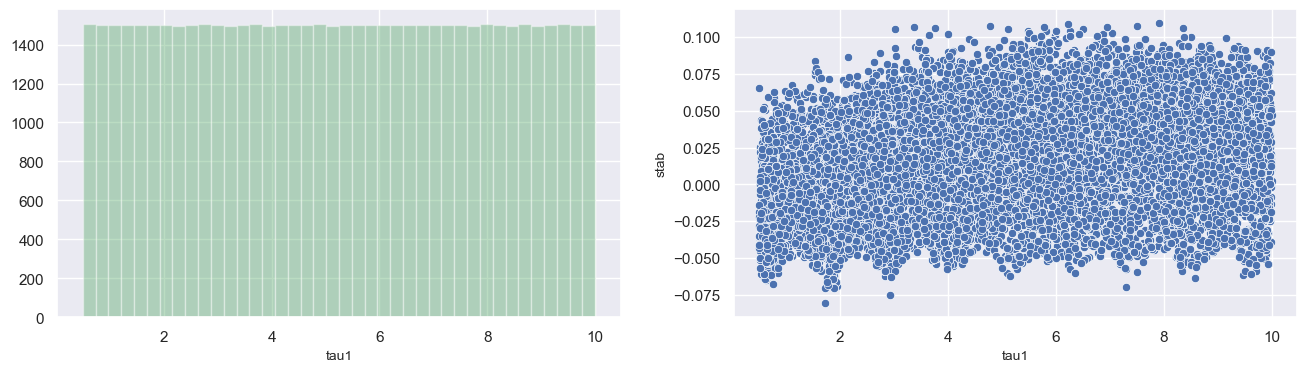

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


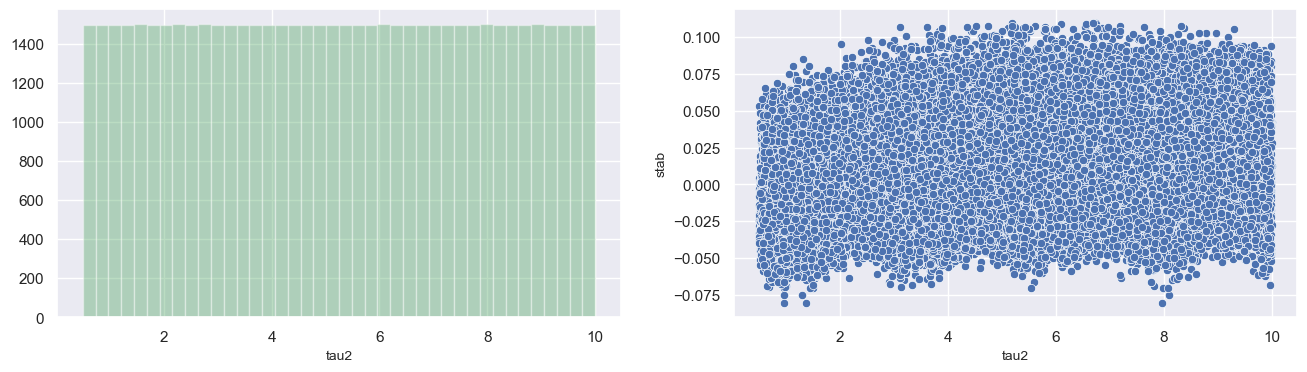

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


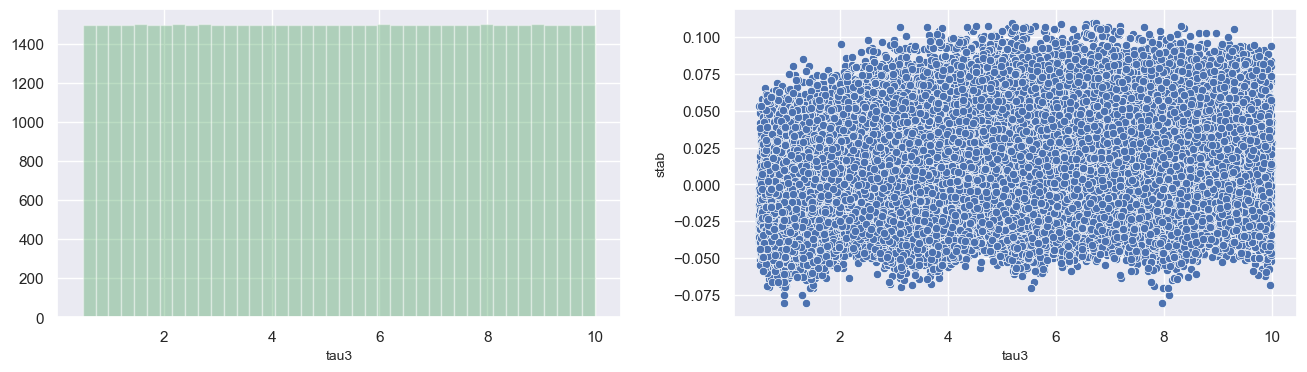

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


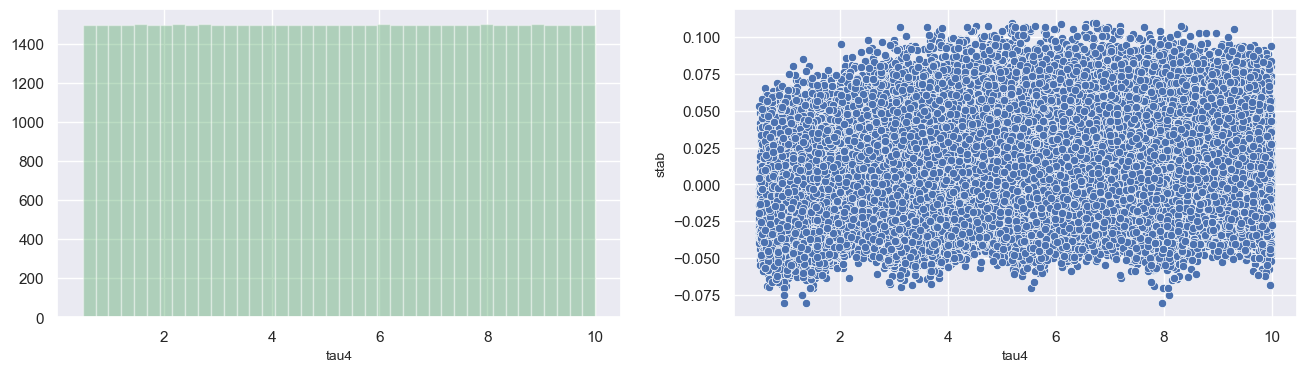

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


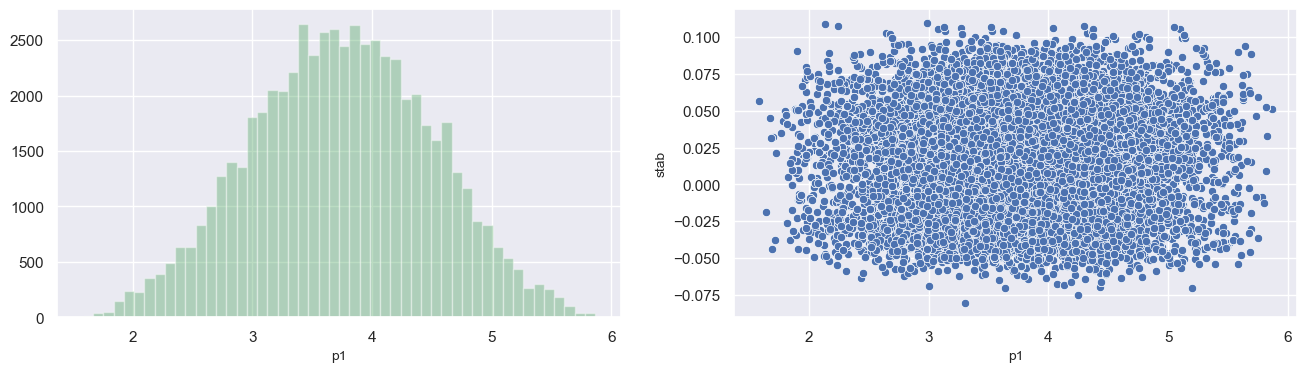

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


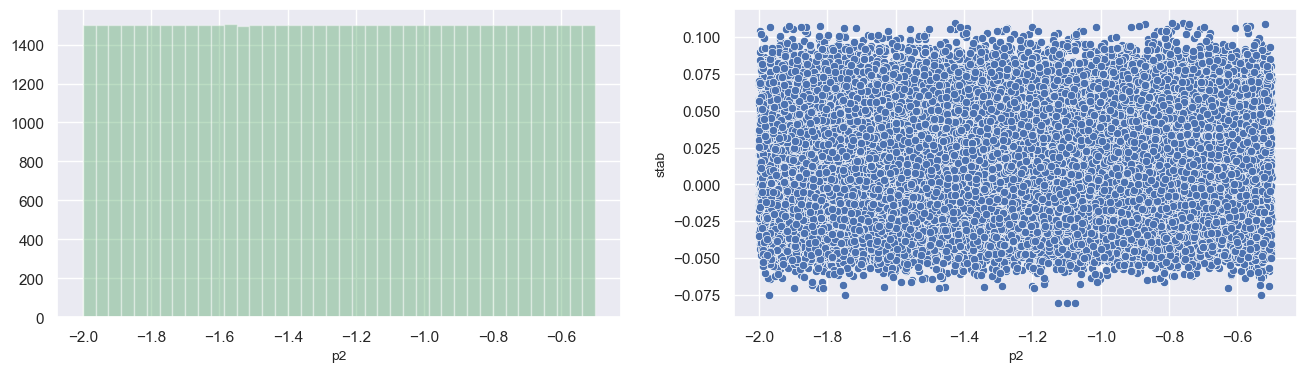

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


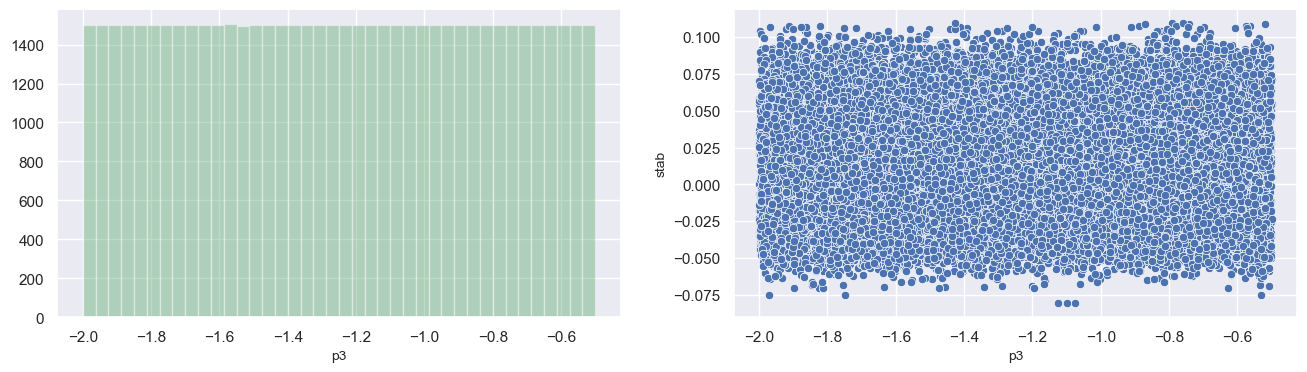

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


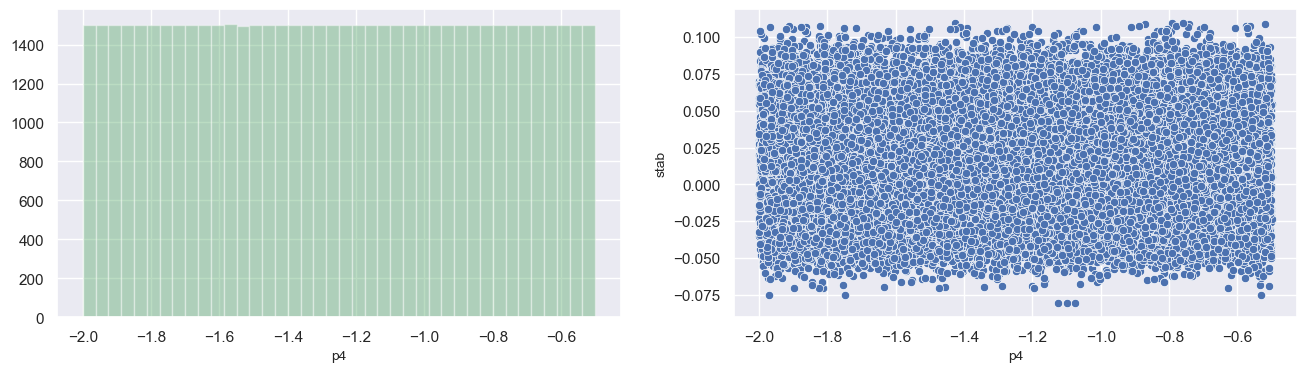

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


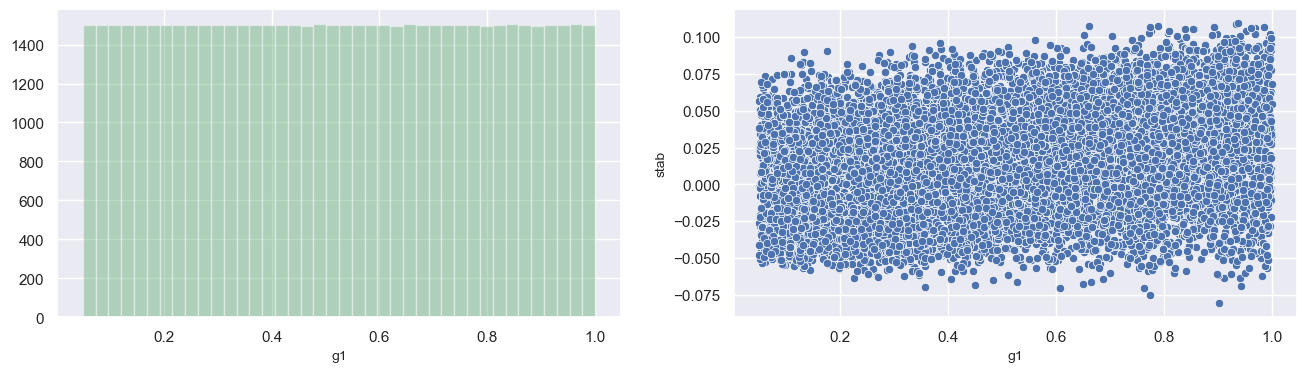

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


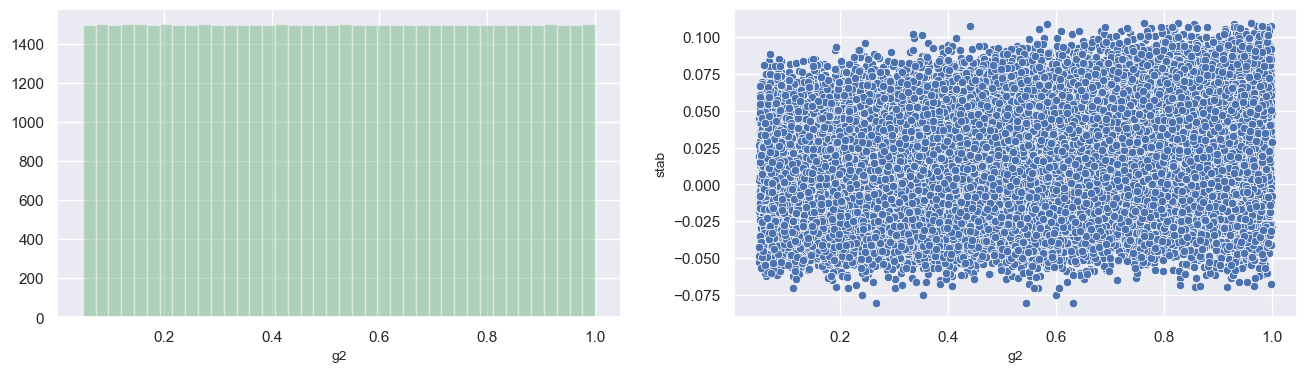

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


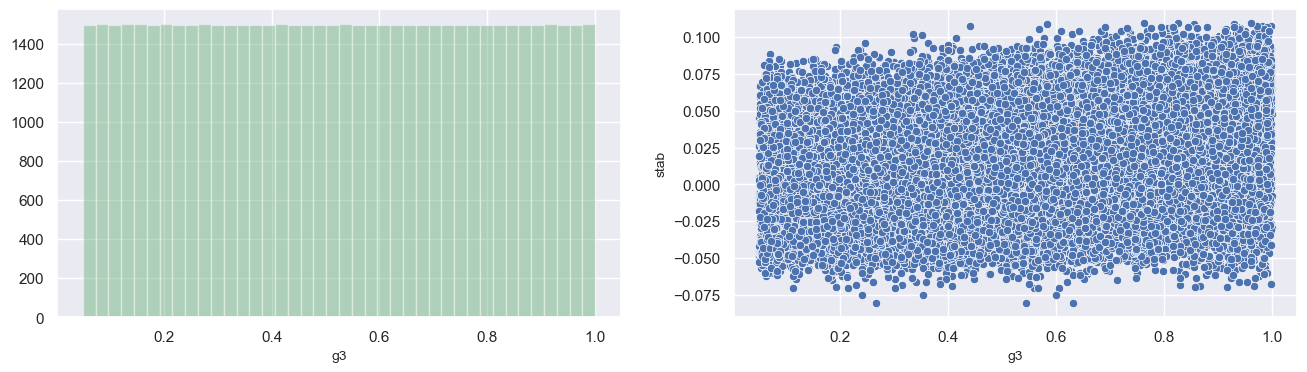

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


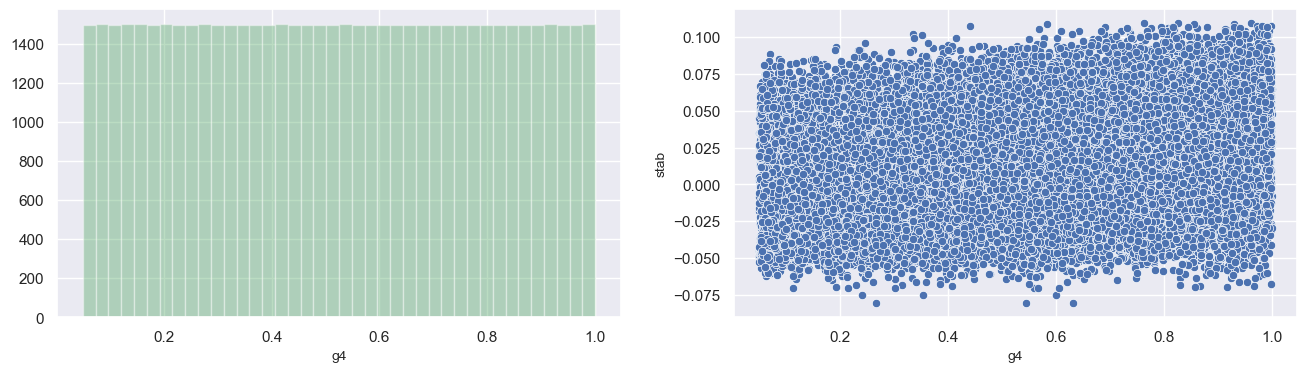

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


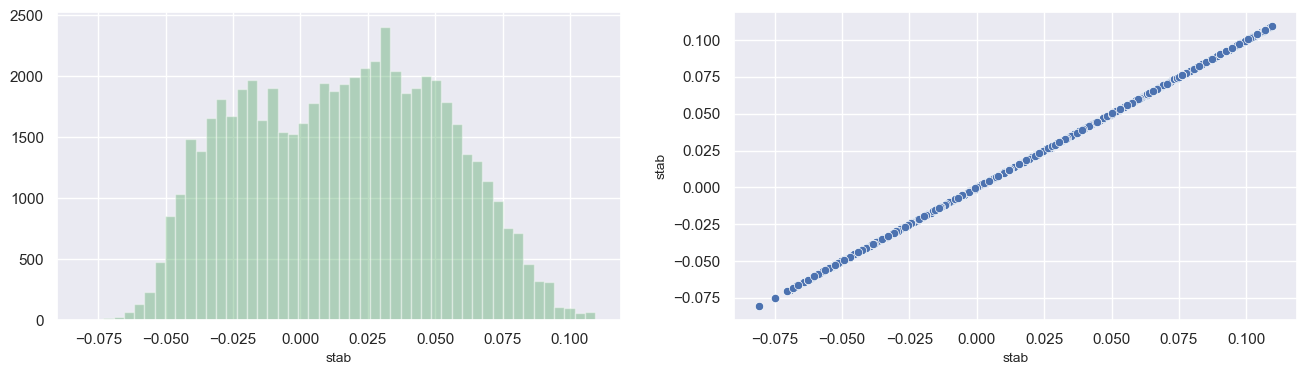

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


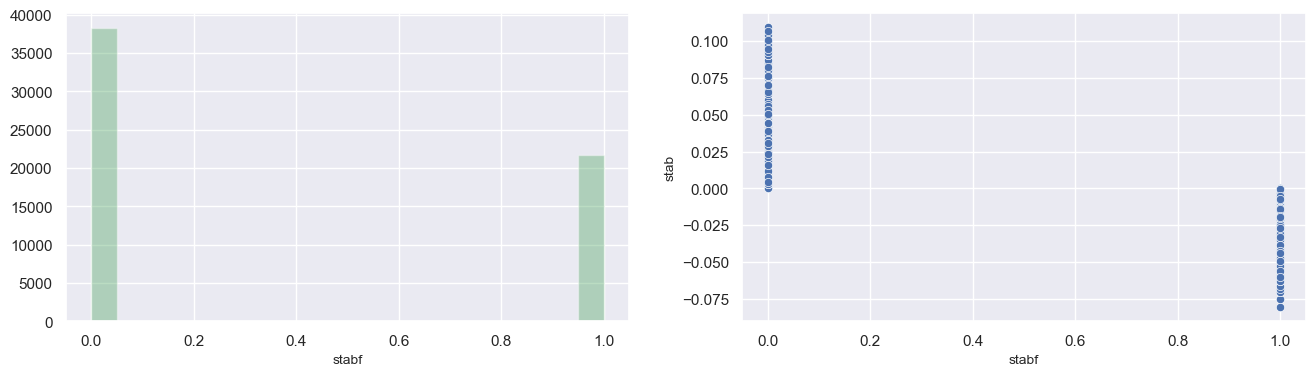

In [8]:
for column in data.columns:
    assessment(data, 'stab', column, -1)

In [9]:
data.p1.skew()

-0.01268842326988342

In [10]:
print(f'Split of "unstable" (0) and "stable" (1) observations in the original dataset:')
print(data['stabf'].value_counts(normalize=True))

Split of "unstable" (0) and "stable" (1) observations in the original dataset:
0    0.638
1    0.362
Name: stabf, dtype: float64


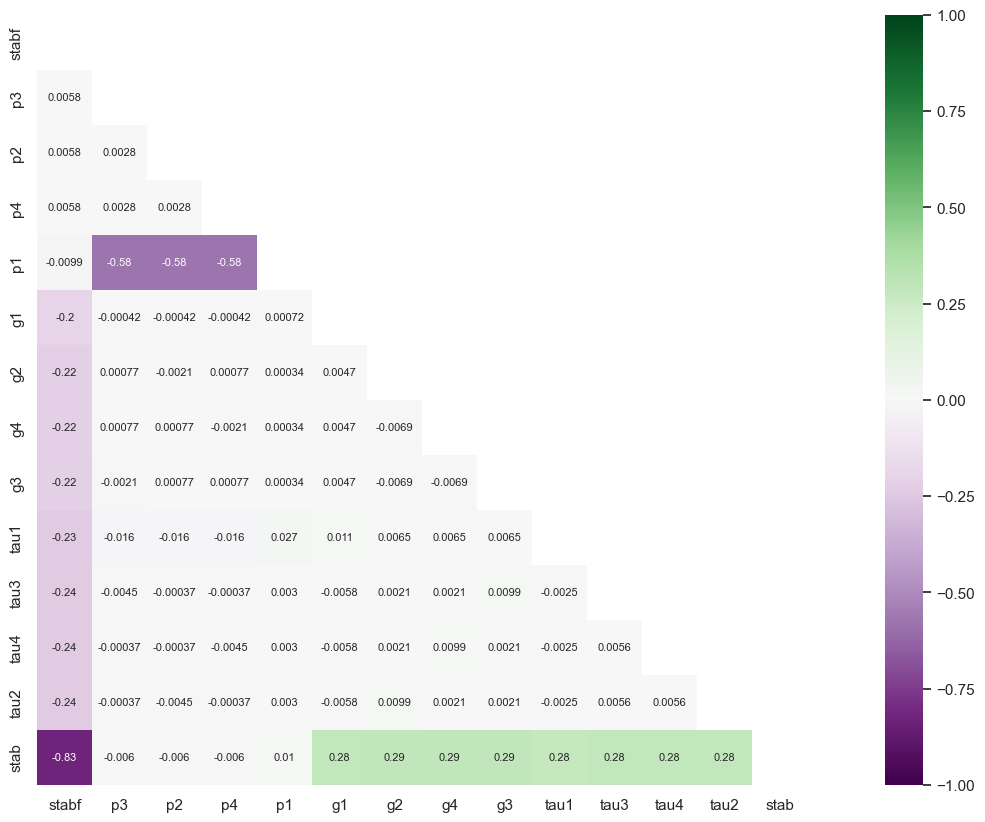

In [11]:
correlation_map(data, 'stabf', 14)

In [12]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

X_training = X.iloc[:54000, :]
y_training = y.iloc[:54000]

X_testing = X.iloc[54000:, :]
y_testing = y.iloc[54000:]

ratio_training = y_training.value_counts(normalize=True)
ratio_testing = y_testing.value_counts(normalize=True)
ratio_training, ratio_testing

(0    0.638352
 1    0.361648
 Name: stabf, dtype: float64,
 0    0.634833
 1    0.365167
 Name: stabf, dtype: float64)

In [13]:
X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values

In [14]:
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)

In [15]:
# ANN initialization
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Third hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))

# Single-node output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    classifier.fit(x_train, y_train, epochs=50, verbose=0)
    classifier_loss, classifier_accuracy = classifier.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

169/169 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9698
Round 1 - Loss: 0.0670 | Accuracy: 96.98 %
169/169 [==============================] - 0s 866us/step - loss: 0.0557 - accuracy: 0.9763
Round 2 - Loss: 0.0557 | Accuracy: 97.63 %
169/169 [==============================] - 0s 839us/step - loss: 0.0553 - accuracy: 0.9776
Round 3 - Loss: 0.0553 | Accuracy: 97.76 %
169/169 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9787
Round 4 - Loss: 0.0524 | Accuracy: 97.87 %
169/169 [==============================] - 0s 1ms/step - loss: 0.0458 - accuracy: 0.9826
Round 5 - Loss: 0.0458 | Accuracy: 98.26 %
169/169 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.9791
Round 6 - Loss: 0.0552 | Accuracy: 97.91 %
169/169 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9870
Round 7 - Loss: 0.0363 | Accuracy: 98.70 %
169/169 [==============================] - 0s 830us/st

In [17]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_training, y_training)

# Make predictions on the testing data
y_pred = model.predict(X_testing)

# Evaluate the model's performance
mse = mean_squared_error(y_testing, y_pred)
r2 = r2_score(y_testing, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 0.13784435239960535
R-squared (R2) Score: 0.4053818957951215


In [18]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create instances of regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

# Fit the models using the training data
linear_reg.fit(X_training, y_training)
decision_tree_reg.fit(X_training, y_training)
random_forest_reg.fit(X_training, y_training)

# Make predictions on the testing data
linear_reg_predictions = linear_reg.predict(X_testing)
decision_tree_reg_predictions = decision_tree_reg.predict(X_testing)
random_forest_reg_predictions = random_forest_reg.predict(X_testing)

# Evaluate the models using R-squared (R2) score
linear_reg_r2 = r2_score(y_testing, linear_reg_predictions)
decision_tree_reg_r2 = r2_score(y_testing, decision_tree_reg_predictions)
random_forest_reg_r2 = r2_score(y_testing, random_forest_reg_predictions)

# Print R2 scores for each model
print("Linear Regression R-squared (R2) Score:", linear_reg_r2)
print("Decision Tree Regression R-squared (R2) Score:", decision_tree_reg_r2)
print("Random Forest Regression R-squared (R2) Score:", random_forest_reg_r2)


Linear Regression R-squared (R2) Score: 0.4053818957951215
Decision Tree Regression R-squared (R2) Score: 0.5844476538846775
Random Forest Regression R-squared (R2) Score: 0.8115552789467019


Epoch 1/50
1688/1688 [==============================] - 2s 982us/step - loss: 0.2298 - accuracy: 0.8992
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1211 - accuracy: 0.9497
Epoch 3/50
1688/1688 [==============================] - 2s 985us/step - loss: 0.0900 - accuracy: 0.9631
Epoch 4/50
1688/1688 [==============================] - 2s 991us/step - loss: 0.0758 - accuracy: 0.9686
Epoch 5/50
1688/1688 [==============================] - 2s 987us/step - loss: 0.0686 - accuracy: 0.9717
Epoch 6/50
1688/1688 [==============================] - 2s 986us/step - loss: 0.0639 - accuracy: 0.9738
Epoch 7/50
1688/1688 [==============================] - 2s 986us/step - loss: 0.0608 - accuracy: 0.9750
Epoch 8/50
1688/1688 [==============================] - 2s 986us/step - loss: 0.0589 - accuracy: 0.9761
Epoch 9/50
1688/1688 [==============================] - 2s 989us/step - loss: 0.0576 - accuracy: 0.9766
Epoch 10/50
1688/1688 [==============================] - 2s 985us/

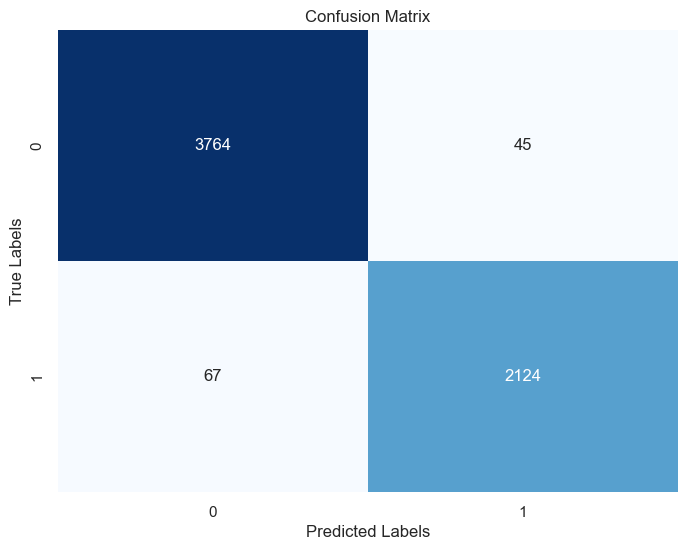

In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_training, y_training, X_testing, and y_testing are your data

# Define your deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_training.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification, change for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Change for regression or multi-class classification
              metrics=['accuracy'])

# Train the model
model.fit(X_training, y_training, epochs=50, batch_size=32)

# Predict on testing data
y_pred = model.predict(X_testing)

# Convert predictions to binary values (if needed)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_testing, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_testing, y_pred_binary)
recall = recall_score(y_testing, y_pred_binary)
f1 = f1_score(y_testing, y_pred_binary)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_testing, y_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2292 - accuracy: 0.9018
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1156 - accuracy: 0.9539
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0864 - accuracy: 0.9664
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0749 - accuracy: 0.9690
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0681 - accuracy: 0.9728
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0646 - accuracy: 0.9740
Epoch 7/50
1688/1688 [==============================] - 2s 998us/step - loss: 0.0620 - accuracy: 0.9753
Epoch 8/50
1688/1688 [==============================] - 2s 996us/step - loss: 0.0582 - accuracy: 0.9774
Epoch 9/50
1688/1688 [==============================] - 2s 999us/step - loss: 0.0564 - accuracy: 0.9772
Epoch 10/50
1688/1688 [==============================] - 2s 992us/step - los

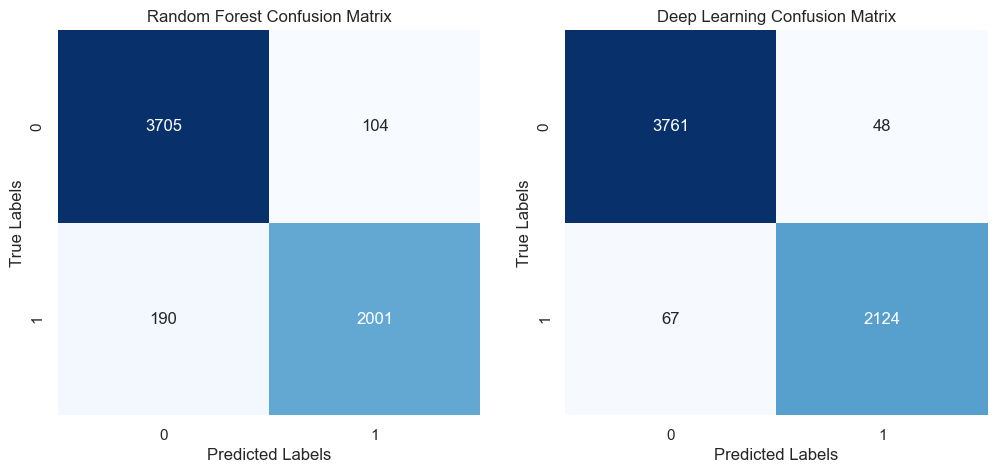

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
import tensorflow as tf

# Assuming X_training, y_training, X_testing, and y_testing are your data

# Machine Learning Model (Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_training, y_training)
y_pred_rf = rf_classifier.predict(X_testing)

# Deep Learning Model
deep_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_training.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification, change for multi-class
])
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Change for regression or multi-class classification
                   metrics=['accuracy'])
deep_model.fit(X_training, y_training, epochs=50, batch_size=32)
y_pred_deep = deep_model.predict(X_testing)
y_pred_deep_binary = (y_pred_deep > 0.5).astype(int)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_testing, y_pred_rf)
rf_precision = precision_score(y_testing, y_pred_rf)
rf_recall = recall_score(y_testing, y_pred_rf)
rf_f1 = f1_score(y_testing, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_testing, y_pred_rf)

print("Random Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

# Evaluate Deep Learning Model
deep_accuracy = accuracy_score(y_testing, y_pred_deep_binary)
deep_precision = precision_score(y_testing, y_pred_deep_binary)
deep_recall = recall_score(y_testing, y_pred_deep_binary)
deep_f1 = f1_score(y_testing, y_pred_deep_binary)
deep_conf_matrix = confusion_matrix(y_testing, y_pred_deep_binary)

print("\nDeep Learning Model Metrics:")
print("Accuracy:", deep_accuracy)
print("Precision:", deep_precision)
print("Recall:", deep_recall)
print("F1-score:", deep_f1)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(deep_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Deep Learning Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
import tensorflow as tf

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2226 - accuracy: 0.9024 - val_loss: 0.1489 - val_accuracy: 0.9382
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1177 - accuracy: 0.9513 - val_loss: 0.0979 - val_accuracy: 0.9632
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0882 - accuracy: 0.9645 - val_loss: 0.0818 - val_accuracy: 0.9695
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0759 - accuracy: 0.9686 - val_loss: 0.0781 - val_accuracy: 0.9678
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0682 - accuracy: 0.9722 - val_loss: 0.0678 - val_accuracy: 0.9725
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0637 - accuracy: 0.9743 - val_loss: 0.0640 - val_accuracy: 0.9747
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0610 - accuracy: 0.9751 - val_loss: 0.0647 - val_accuracy:

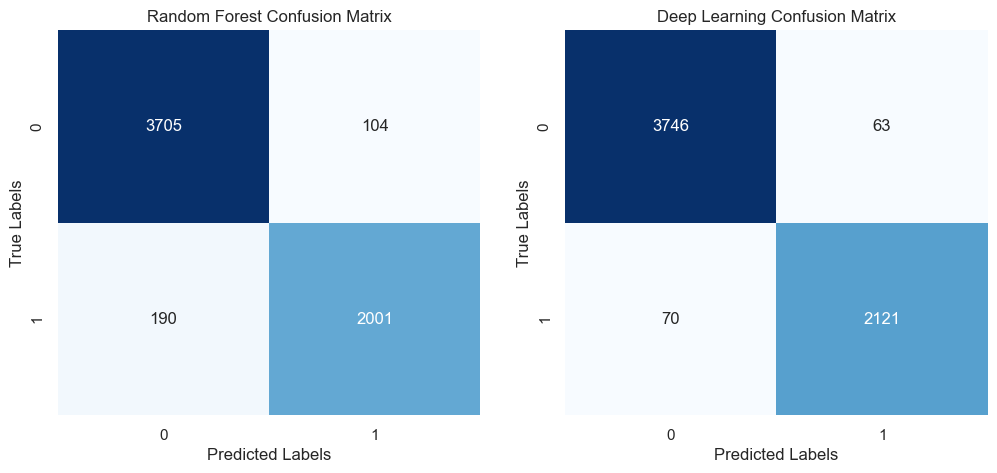

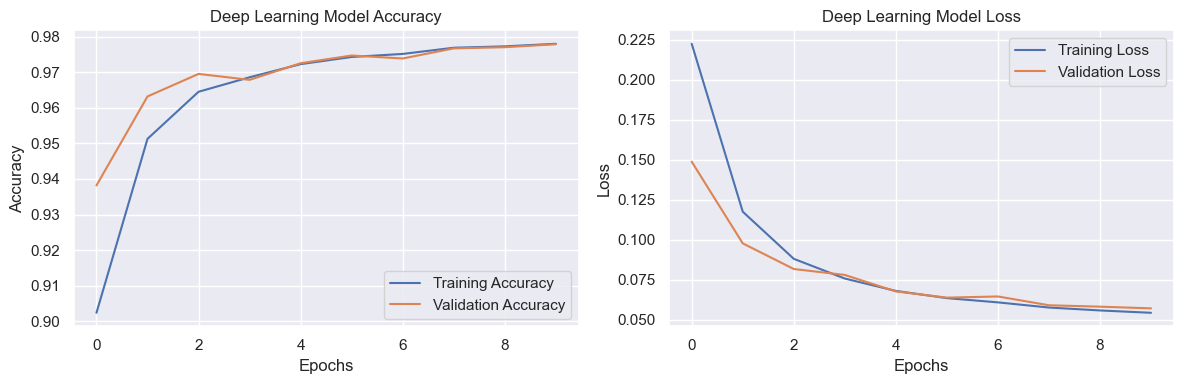

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
import tensorflow as tf

# Assuming X_training, y_training, X_testing, and y_testing are your data

# Machine Learning Model (Random Forest)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_training, y_training)
y_pred_rf = rf_classifier.predict(X_testing)

# Deep Learning Model
deep_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_training.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification, change for multi-class
])
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Change for regression or multi-class classification
                   metrics=['accuracy'])
history = deep_model.fit(X_training, y_training, epochs=10, batch_size=32, validation_data=(X_testing, y_testing))

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_testing, y_pred_rf)
rf_precision = precision_score(y_testing, y_pred_rf)
rf_recall = recall_score(y_testing, y_pred_rf)
rf_f1 = f1_score(y_testing, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_testing, y_pred_rf)

print("Random Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

# Evaluate Deep Learning Model
y_pred_deep = deep_model.predict(X_testing)
y_pred_deep_binary = (y_pred_deep > 0.5).astype(int)
deep_accuracy = accuracy_score(y_testing, y_pred_deep_binary)
deep_precision = precision_score(y_testing, y_pred_deep_binary)
deep_recall = recall_score(y_testing, y_pred_deep_binary)
deep_f1 = f1_score(y_testing, y_pred_deep_binary)
deep_conf_matrix = confusion_matrix(y_testing, y_pred_deep_binary)

print("\nDeep Learning Model Metrics:")
print("Accuracy:", deep_accuracy)
print("Precision:", deep_precision)
print("Recall:", deep_recall)
print("F1-score:", deep_f1)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(deep_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Deep Learning Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.show()

# Plot accuracy and loss for the Deep Learning Model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Deep Learning Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Deep Learning Model Loss')

plt.tight_layout()
plt.show()


Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2209 - accuracy: 0.9027 - val_loss: 0.1442 - val_accuracy: 0.9362
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1124 - accuracy: 0.9544 - val_loss: 0.0970 - val_accuracy: 0.9590
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0888 - accuracy: 0.9637 - val_loss: 0.0842 - val_accuracy: 0.9647
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0751 - accuracy: 0.9696 - val_loss: 0.0733 - val_accuracy: 0.9738
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0695 - accuracy: 0.9722 - val_loss: 0.0716 - val_accuracy: 0.9695
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0633 - accuracy: 0.9752 - val_loss: 0.0633 - val_accuracy: 0.9735
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0602 - accuracy: 0.9756 - val_loss: 0.0625 - val_accuracy:

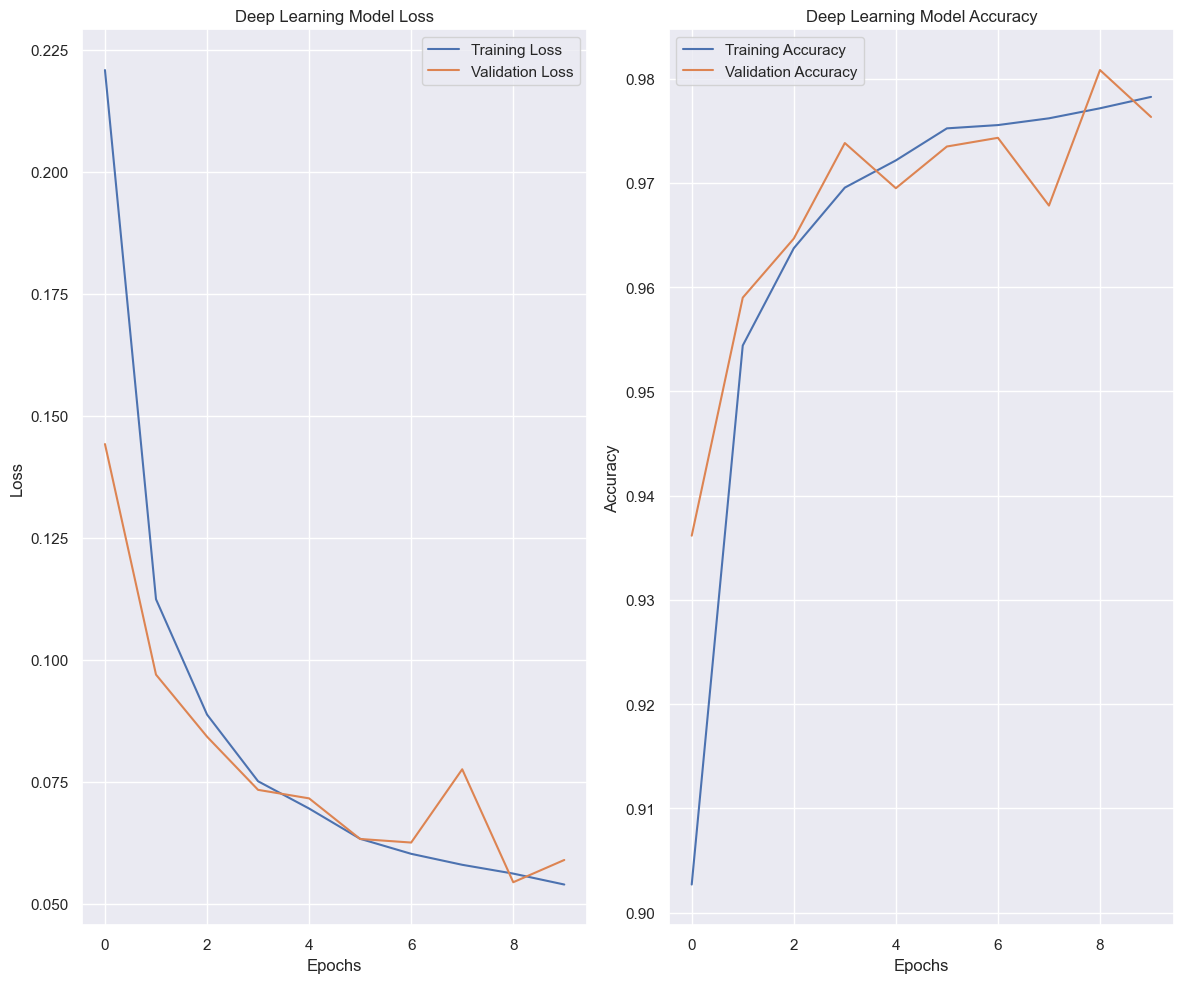

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
import tensorflow as tf

# Assuming X_training, y_training, X_testing, and y_testing are your data

# Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_training, y_training)
y_pred_logistic = logistic_classifier.predict(X_testing)

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_training, y_training)
y_pred_svm = svm_classifier.predict(X_testing)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_training, y_training)
y_pred_dt = dt_classifier.predict(X_testing)

# Deep Learning Model
deep_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_training.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification, change for multi-class
])
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Change for regression or multi-class classification
                   metrics=['accuracy'])
history = deep_model.fit(X_training, y_training, epochs=10, batch_size=32, validation_data=(X_testing, y_testing))

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_testing, y_pred_logistic)
logistic_precision = precision_score(y_testing, y_pred_logistic)
logistic_recall = recall_score(y_testing, y_pred_logistic)
logistic_f1 = f1_score(y_testing, y_pred_logistic)
logistic_conf_matrix = confusion_matrix(y_testing, y_pred_logistic)

print("Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1-score:", logistic_f1)

# Evaluate SVM
svm_accuracy = accuracy_score(y_testing, y_pred_svm)
svm_precision = precision_score(y_testing, y_pred_svm)
svm_recall = recall_score(y_testing, y_pred_svm)
svm_f1 = f1_score(y_testing, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_testing, y_pred_svm)

print("\nSVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

# Evaluate Decision Tree Classifier
dt_accuracy = accuracy_score(y_testing, y_pred_dt)
dt_precision = precision_score(y_testing, y_pred_dt)
dt_recall = recall_score(y_testing, y_pred_dt)
dt_f1 = f1_score(y_testing, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_testing, y_pred_dt)

print("\nDecision Tree Classifier Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(logistic_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression Confusion Matrix')
axes[0, 0].set_xlabel('Predicted Labels')
axes[0, 0].set_ylabel('True Labels')

sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('SVM Confusion Matrix')
axes[0, 1].set_xlabel('Predicted Labels')
axes[0, 1].set_ylabel('True Labels')

sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('Decision Tree Confusion Matrix')
axes[1, 0].set_xlabel('Predicted Labels')
axes[1, 0].set_ylabel('True Labels')

# Plot accuracy and loss for the Deep Learning Model
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Deep Learning Model Accuracy')

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Deep Learning Model Loss')

plt.tight_layout()
plt.show()
